
## BANK MARKETING ANALYZE PROJECT 

## Data Cleaning and Manipulation

In this project, the marketing dataset was preprocessed to ensure clean and consistent data for analysis and modeling. The main steps included:


###  General Dataset Settings
- Display settings were adjusted to show all columns for inspection using:
  ```python
  pd.set_option('display.max_columns', None)

###  Cleaning Whitespace, Dots, and Special Characters

Values in cells were cleaned to remove unnecessary whitespace, dots (.), and other special characters to ensure consistency.

This helped prevent errors during analysis and numeric computations.

###  Dropping Unnecessary Columns Safely
- Columns that were irrelevant for analysis or contained mostly missing values (e.g., `job`, `default`, `education`) were removed.  
- The `errors='ignore'` parameter was used to avoid errors if any column was already missing.

###  Recategorizing Categorical Columns

Columns like job and education were regrouped into more meaningful categories for easier visualization and modeling.

###  Renaming Columns

Certain column names were updated for clarity and consistency.

For example, job_grouped was renamed to job and education_grouped to education.

###  Handling Missing or “unknown” Values

Categorical columns contained unknown entries.

Depending on the analysis, these values were either removed if minimal or converted into a separate category (no_info) to preserve information.

Example: In the loan column, the 2.4% of unknown values were retained as a separate category.

###  Cleaning Whitespace, Dots, and Special Characters

Values in cells were cleaned to remove unnecessary whitespace, dots (.), and other special characters to ensure consistency.

This helped prevent errors during analysis and numeric computations.

In [194]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [156]:
marketing_data = pd.read_csv("C:/Users/User/Desktop/bank-additional-full.csv", sep=';')

pd.set_option('display.max_columns', None)
marketing_data.sample(n=10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
11595,36,blue-collar,single,basic.9y,unknown,unknown,unknown,telephone,jun,fri,25,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
6043,41,blue-collar,married,basic.9y,no,no,no,telephone,may,tue,73,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2650,29,technician,married,professional.course,no,no,no,telephone,may,tue,492,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
32528,34,blue-collar,married,basic.9y,unknown,yes,yes,telephone,may,fri,219,4,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
2292,30,admin.,single,university.degree,no,yes,no,telephone,may,tue,178,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
13156,36,admin.,married,university.degree,no,yes,no,cellular,jul,wed,99,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
5754,37,admin.,single,high.school,no,yes,no,telephone,may,mon,192,6,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28313,27,technician,single,basic.9y,no,no,no,cellular,apr,wed,34,3,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,no
5406,37,admin.,single,university.degree,no,yes,yes,telephone,may,fri,138,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
314,40,management,married,university.degree,unknown,yes,no,telephone,may,mon,358,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Data Information**

print(marketing_data.describe(include ='object'))
marketing_data.columns
marketing_data.info()
marketing_data.isnull().sum()

**Data Cleaning & Manipulation**

*The marketing dataset was preprocessed to ensure consistency and usability.
Columns were renamed for clarity, unnecessary columns were safely dropped, and unknown values were either removed or converted into a separate category (no_info) depending on their proportion.
Categorical variables such as job and education were regrouped into meaningful categories to simplify analysis and modeling. 
Display settings and warnings were adjusted to facilitate data inspection.*

In [157]:
marketing_data['education'] = marketing_data['education'].str.replace('.',' ', regex=False)
print(marketing_data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic 4y       no      no   no  telephone   
1   57   services  married  high school  unknown      no   no  telephone   
2   37   services  married  high school       no     yes   no  telephone   
3   40     admin.  married     basic 6y       no      no   no  telephone   
4   56   services  married  high school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [158]:
marketing_data['education'].value_counts()

education
university degree      12168
high school             9515
basic 9y                6045
professional course     5243
basic 4y                4176
basic 6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [159]:
marketing_data['job'] = marketing_data['job'].str.replace('.','', regex=False)
marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [160]:
# Job recategorize 
education_map = {
    'basic 4y': 'basic degree',
    'basic 6y': 'basic degree',
    'basic 9y': 'basic degree',
    'university degree' :'university degree',
    'high school':'high school',
    'professional course':'professional course',
    'unknown ' :'unknown',
    'illiterate ':'illiterate'
}

# Yeni sütun oluştur
marketing_data['education_grouped'] = marketing_data['education'].map(education_map)
marketing_data = marketing_data.drop(columns=['education'], errors = 'ignore')
marketing_data.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_grouped
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic degree
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school
3,40,admin,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic degree
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school


In [161]:
# job  recategorize 
job_map = {
    'admin': 'white-collar',
    'management': 'white-collar',
    'technician': 'technical',
    'services': 'service/labor',
    'housemaid': 'service/labor',
    'blue-collar': 'service/labor',
    'entrepreneur': 'self-employed',
    'self-employed': 'self-employed',
    'retired': 'retired',
    'unemployed': 'unemployed',
    'student': 'student',
    'unknown': 'unknown'
}

# Yeni sütun oluştur
marketing_data['job_grouped'] = marketing_data['job'].map(job_map)
marketing_data.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_grouped,job_grouped
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic degree,service/labor
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school,service/labor
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school,service/labor
3,40,admin,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic degree,white-collar
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school,service/labor


In [162]:
#Find unknown values 
# Her sütundaki 'unknown' değer sayısını bul
unknown_counts = (marketing_data == 'unknown').sum()

# Sadece 'unknown' değeri olan sütunları filtrele
unknown_counts = unknown_counts[unknown_counts > 0]

print("Sütunlardaki 'unknown' değer sayıları:")
print(unknown_counts)


Sütunlardaki 'unknown' değer sayıları:
job             330
marital          80
default        8597
housing         990
loan            990
job_grouped     330
dtype: int64


In [163]:
# Silmek istediğin sütunlar
columns_to_drop = ['job', 'default', 'education']

# Sütunları güvenli şekilde sil
marketing_data = marketing_data.drop(columns=columns_to_drop, errors='ignore')

# Sütun adlarını yeniden adlandır
marketing_data.rename(columns={
    'education_grouped': 'education',
    'job_grouped': 'job'
}, inplace=True)

marketing_data.head()

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,job
0,56,married,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic degree,service/labor
1,57,married,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school,service/labor
2,37,married,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school,service/labor
3,40,married,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic degree,white-collar
4,56,married,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school,service/labor


In [164]:
#Handle Unknown for job and education 

marketing_data['job'] = marketing_data['job'].replace('unknown', 'other')
marketing_data['education'] = marketing_data['education'].replace('unknown', 'other')

In [165]:
# Handle housing and loan unknown manipulation 

marketing_data['housing'] = marketing_data['housing'].replace('unknown', 'no_info')
marketing_data['loan'] = marketing_data['loan'].replace('unknown', 'no_info')


In [225]:
#Marital status unknown values manipulation 

marital_counts = marketing_data['marital'].value_counts(normalize=True)
print(marital_counts)

unknown_idx = marketing_data[marketing_data['marital'] == 'unknown'].index
# Mevcut dağılım
choices = marital_counts.index
probabilities = marital_counts.values

# Eksik değerleri rastgele mevcut dağılıma göre ata
marketing_data.loc[unknown_idx, 'marital'] = np.random.choice(choices, size=len(unknown_idx), p=probabilities)
marketing_data['marital'].value_counts(normalize=True)

marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64


marital
married     0.606487
single      0.281393
divorced    0.112120
Name: proportion, dtype: float64

In [226]:
categorical_columns = marketing_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(marketing_data[col].value_counts())
    print("\n")

Value counts for marital:
marital
married     24980
single      11590
divorced     4618
Name: count, dtype: int64


Value counts for housing:
housing
yes        21576
no         18622
no_info      990
Name: count, dtype: int64


Value counts for loan:
loan
no         33950
yes         6248
no_info      990
Name: count, dtype: int64


Value counts for contact:
contact
cellular     26144
telephone    15044
Name: count, dtype: int64


Value counts for month:
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


Value counts for day_of_week:
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


Value counts for poutcome:
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


Value counts for y:
y
no     36548
yes     4640
Name: count, dtype: int64


Value counts for education:
education
basic

In [227]:
#Find unknown values 
# Her sütundaki 'unknown' değer sayısını bul
unknown_counts = (marketing_data == 'unknown').sum()

# Sadece 'unknown' değeri olan sütunları filtrele
unknown_counts = unknown_counts[unknown_counts > 0]

print("Sütunlardaki 'unknown' değer sayıları:")
print(unknown_counts)


Sütunlardaki 'unknown' değer sayıları:
Series([], dtype: int64)


In [228]:
marketing_data.sample(n=10)

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,job
4892,44,divorced,yes,no,telephone,may,wed,269,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,high school,unemployed
11072,35,married,yes,no,telephone,jun,wed,55,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,high school,white-collar
37831,50,married,no,yes,cellular,aug,thu,460,1,15,2,failure,-2.9,92.201,-31.4,0.829,5076.2,yes,university degree,white-collar
24530,46,married,no_info,no_info,cellular,nov,mon,254,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,university degree,self-employed
31265,33,married,yes,no,cellular,may,wed,585,2,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no,university degree,self-employed
27942,32,single,yes,no,cellular,mar,fri,271,2,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1,yes,university degree,white-collar
40619,43,married,no,no,cellular,sep,mon,255,1,3,1,success,-1.1,94.199,-37.5,0.882,4963.6,yes,university degree,self-employed
11009,46,married,no_info,no_info,telephone,jun,wed,156,9,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,university degree,self-employed
36838,29,single,yes,yes,cellular,jun,mon,89,2,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes,high school,white-collar
961,58,married,no,no,telephone,may,wed,118,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,NaN,other


**Data Visualization**


<span style="color:blue; font-weight:bold">Age Distribution of Customers</span>

In [229]:
marketing_data.head(2)

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,job
0,56,married,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic degree,service/labor
1,57,married,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high school,service/labor


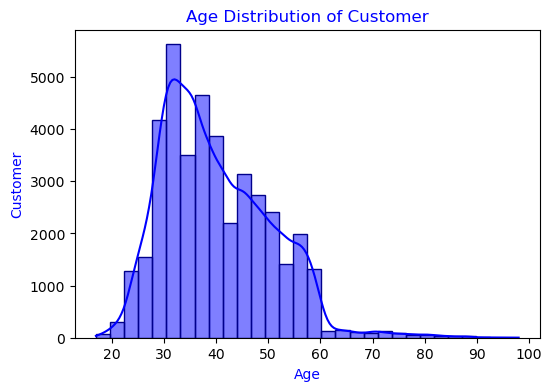

In [230]:
plt.figure(figsize=(6,4))
sns.histplot(marketing_data['age'], bins = 30, color = 'blue', edgecolor = 'darkblue', kde=True)
plt.title('Age Distribution of Customer', color = 'blue', fontsize=12)
plt.xlabel('Age',color = 'blue', fontsize=10)
plt.ylabel('Customer',color = 'blue', fontsize=10)
plt.show()

<span style="color:blue; font-weight:bold">Education level on marital status</span>

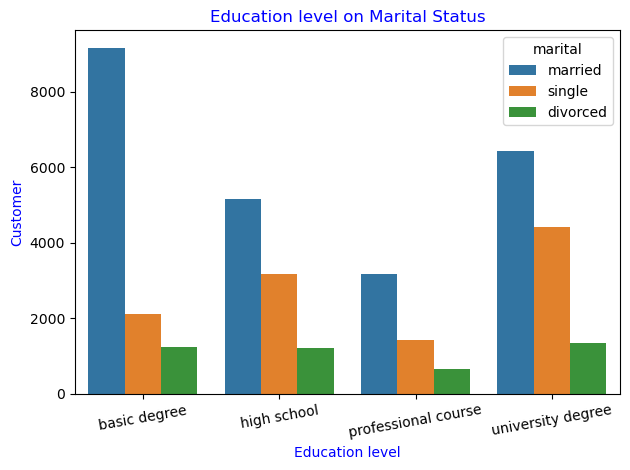

In [231]:
sns.countplot(x='education', hue = 'marital', data=marketing_data)
plt.title('Education level on Marital Status',color = 'blue', fontsize=12)
plt.xlabel('Education level',color = 'blue', fontsize=10)
plt.ylabel('Customer',color = 'blue', fontsize=10)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


<span style="color:blue; font-weight:bold">Housing & Loan</span>

In [232]:
# Kategorik değişkenler list
categorical_cols = ['housing', 'loan']

# Boş dataframe hazırlıyoruz korelasyon için
cramers_results = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                               index=categorical_cols, columns=categorical_cols)

# Cramér's V hesaplama
for col1 in categorical_cols:
    for col2 in categorical_cols:
        contingency_table = pd.crosstab(marketing_data[col1], marketing_data[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
        cramers_results.loc[col1, col2] = cramers_v

print(cramers_results)

         housing     loan
housing  1.00000  0.70787
loan     0.70787  1.00000


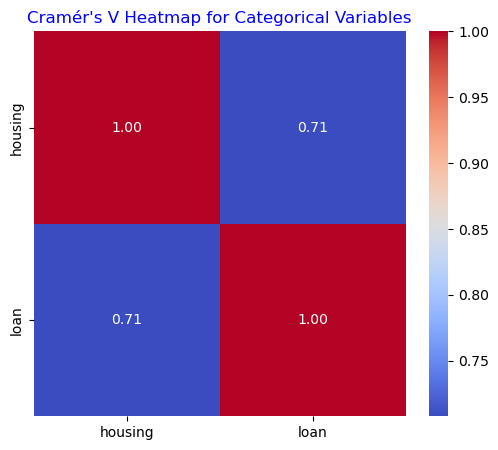

In [233]:
#Visualize correlations
plt.figure(figsize=(6,5))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Heatmap for Categorical Variables",color = 'blue', fontsize=12)
plt.show()


<span style="color:blue; font-weight:bold">Loan / Housing vs Target Variable</span>

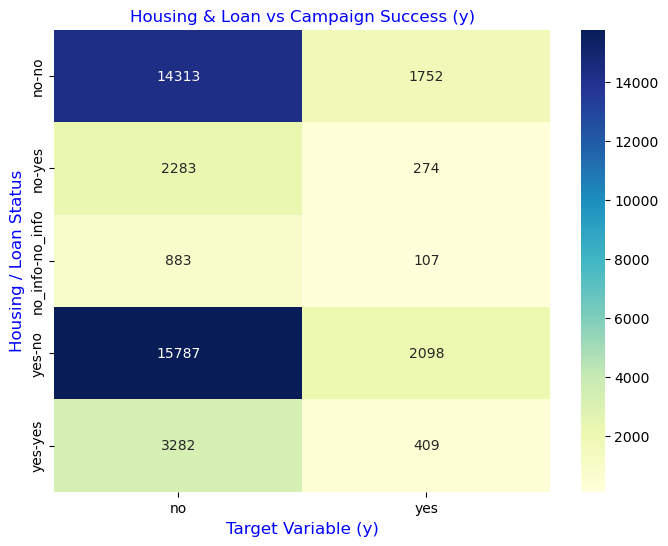

In [234]:
loan_housing_y = pd.crosstab([marketing_data['housing'], marketing_data['loan']], marketing_data['y'])

plt.figure(figsize=(8,6))
sns.heatmap(loan_housing_y, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Housing & Loan vs Campaign Success (y)",color = 'blue', fontsize=12)
plt.xlabel("Target Variable (y)",color = 'blue', fontsize=12)
plt.ylabel("Housing / Loan Status",color = 'blue', fontsize=12)
plt.show()


<span style="color:blue; font-weight:bold">Campaign Success by Job</span>

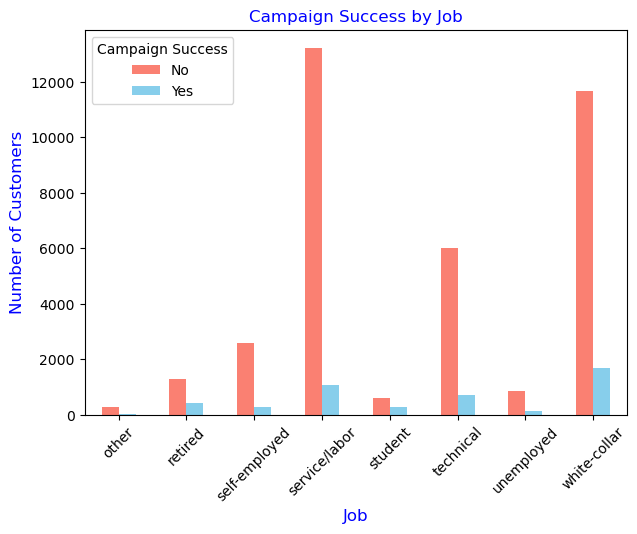

In [235]:
job_campaign = pd.crosstab(marketing_data['job'], marketing_data['y'])

# Grouped bar chart
job_campaign.plot(kind='bar', figsize=(7,5), color=['salmon','skyblue'])
plt.title("Campaign Success by Job",color = 'blue', fontsize=12)
plt.xlabel("Job",color = 'blue', fontsize=12)
plt.ylabel("Number of Customers",color = 'blue', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Campaign Success', labels=['No','Yes'])
plt.show()


<span style="color:blue; font-weight:bold">Education vs Housing Status</span>

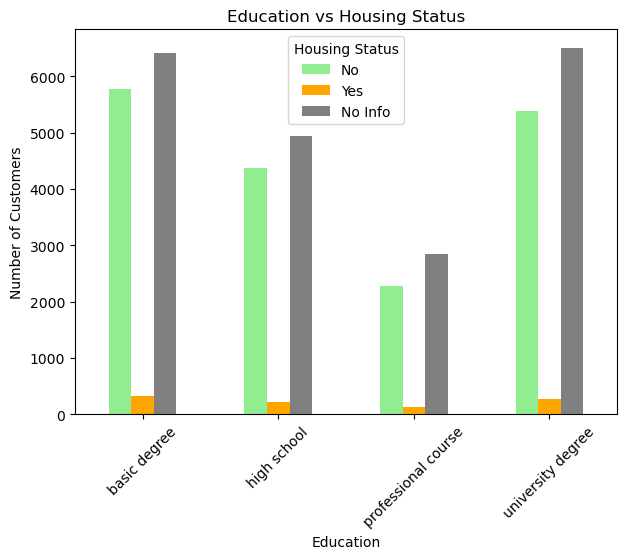

In [236]:
# Education ve Housing durumları
edu_housing = pd.crosstab(marketing_data['education'], marketing_data['housing'])

# Grouped bar chart
edu_housing.plot(kind='bar', figsize=(7,5), color=['lightgreen','orange','grey'])
plt.title("Education vs Housing Status")
plt.xlabel("Education")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title='Housing Status', labels=['No','Yes','No Info'])
plt.show()


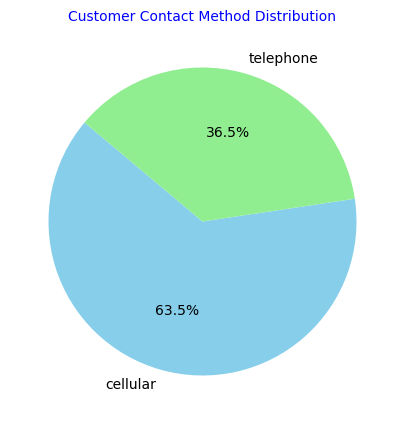

In [208]:
# Contact method value counts
contact_counts = marketing_data['contact'].value_counts()

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue','lightgreen'])
plt.title("Customer Contact Method Distribution", color = 'blue', fontsize=10)
plt.show()


<span style="color:blue; font-weight:bold">Day of Week Analysis</span>

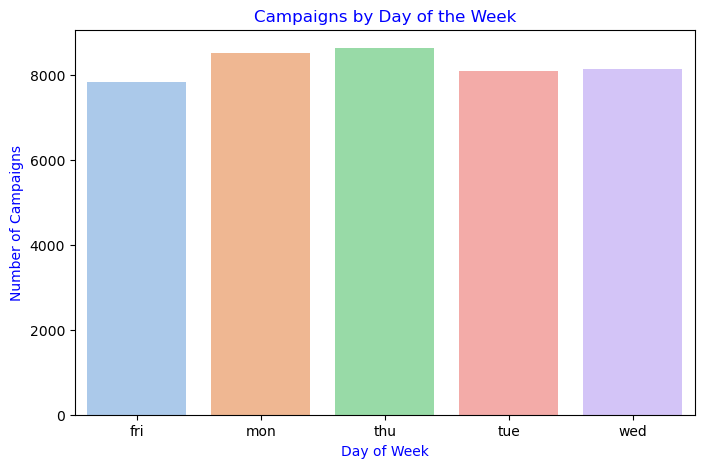

In [211]:
day_counts = marketing_data['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="pastel")
plt.title("Campaigns by Day of the Week",color = 'blue', fontsize=12)
plt.xlabel("Day of Week",color = 'blue', fontsize=10)
plt.ylabel("Number of Campaigns",color = 'blue', fontsize=10)
plt.show()

<span style="color:blue; font-weight:bold">Poutcome Analysis</span>

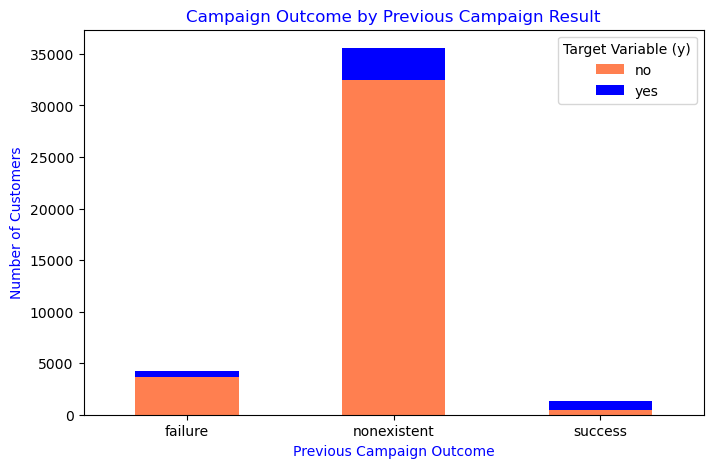

In [216]:
poutcome_y = pd.crosstab(marketing_data['poutcome'], marketing_data['y'])

poutcome_y.plot(kind='bar', stacked=True, figsize=(8,5), color=['coral','blue'])
plt.title("Campaign Outcome by Previous Campaign Result",color = 'blue', fontsize=12)
plt.xlabel("Previous Campaign Outcome",color = 'blue', fontsize=10)
plt.ylabel("Number of Customers",color = 'blue', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title='Target Variable (y)')
plt.show()

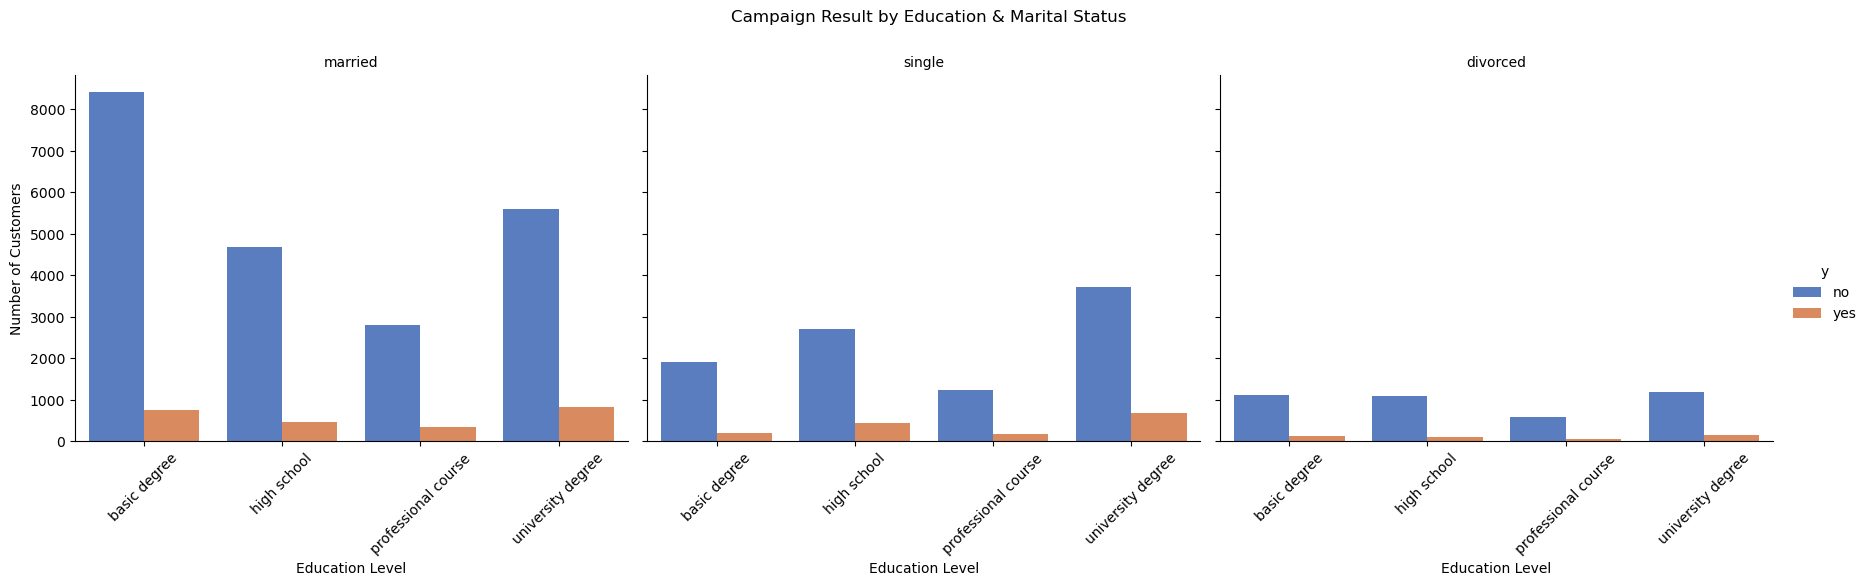

In [237]:
g = sns.catplot(
    data=marketing_data,
    x="education", hue="y", col="marital",
    kind="count", height=5, aspect=1.2, palette="muted"
)
g.set_xticklabels(rotation=45)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Education Level", "Number of Customers")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Campaign Result by Education & Marital Status")
plt.show()